In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import scipy.stats as stats
import string

In [99]:
data_path = '/home/michaelneuder/github/shakespeare/data'

In [133]:
data = pd.read_csv(os.path.join(data_path, 'wiki_movie_plots_deduped.csv'))

In [134]:
words = ''
remove = string.punctuation
pattern = r"[{}]".format(remove) 

for index, row in data.iterrows():
    words += re.sub(pattern, "",row['Plot'].lower())

In [135]:
words = words.split()

In [136]:
counts = dict()
for word in words:
    counts[word] = counts.get(word, 0) + 1

In [137]:
sorted_by_value = sorted(counts.items(), key=lambda kv: kv[1])

In [138]:
sorted_max = sorted_by_value[::-1]

In [106]:
vals_plots = [val[1]/sorted_max[0][1] for val in sorted_max[:1000]]

In [121]:
plt.style.use('ggplot')

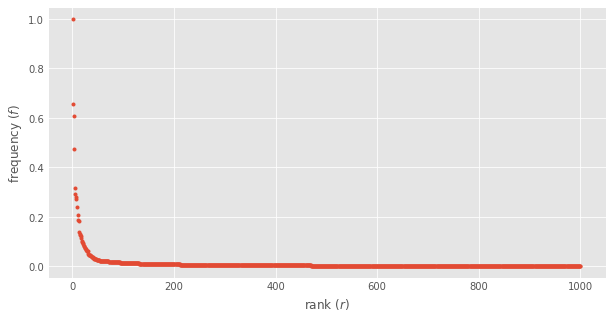

In [123]:
f, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(1, len(vals_plots)+1), vals_plots, '.')
ax.set_xlabel('rank ($r$)')
ax.set_ylabel('frequency ($f$)')
plt.savefig('modern_normal.png')

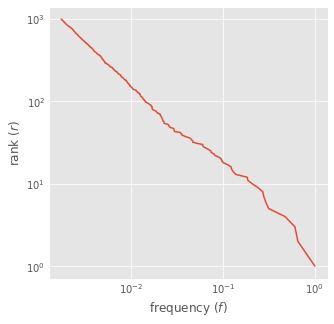

In [127]:
f, ax = plt.subplots(figsize=(5,5))
ax.loglog(vals_plots, np.arange(1, len(vals_plots)+1))
ax.set_ylabel('rank ($r$)')
ax.set_xlabel('frequency ($f$)')
plt.savefig('modern_normal_ll.png')

In [156]:
stats.linregress(log_rank, log_posts)

LinregressResult(slope=-0.9630066837798338, intercept=0.2834325792091317, rvalue=-0.9981581817072496, pvalue=0.0, stderr=0.0018526909650422513)

In [157]:
shake_data = pd.read_csv(os.path.join(data_path, 'Shakespeare_data.csv'))

In [169]:
list(shake_data['Play'].drop_duplicates())

['Henry IV',
 'Henry VI Part 1',
 'Henry VI Part 2',
 'Henry VI Part 3',
 'Alls well that ends well',
 'As you like it',
 'Antony and Cleopatra',
 'A Comedy of Errors',
 'Coriolanus',
 'Cymbeline',
 'Hamlet',
 'Henry V',
 'Henry VIII',
 'King John',
 'Julius Caesar',
 'King Lear',
 'Loves Labours Lost',
 'macbeth',
 'Measure for measure',
 'Merchant of Venice',
 'Merry Wives of Windsor',
 'A Midsummer nights dream',
 'Much Ado about nothing',
 'Othello',
 'Pericles',
 'Richard II',
 'Richard III',
 'Romeo and Juliet',
 'Taming of the Shrew',
 'The Tempest',
 'Timon of Athens',
 'Titus Andronicus',
 'Troilus and Cressida',
 'Twelfth Night',
 'Two Gentlemen of Verona',
 'A Winters Tale']

In [187]:
def getFreqs(data, play):
    data = data[data.Play == play]
    words = ''
    remove = string.punctuation
    pattern = r"[{}]".format(remove) 

    for index, row in data.iterrows():
        words += re.sub(pattern, "",row['PlayerLine'].lower())
    
    words = words.split()
    counts = dict()
    for word in words:
        counts[word] = counts.get(word, 0) + 1
    sorted_by_value = sorted(counts.items(), key=lambda kv: kv[1])
    sorted_max = sorted_by_value[::-1]
    return [val[1] for val in sorted_max[:1000]]

In [189]:
freqs = {}
for key in list(shake_data['Play'].drop_duplicates()):
    freqs[key] = getFreqs(shake_data, key)

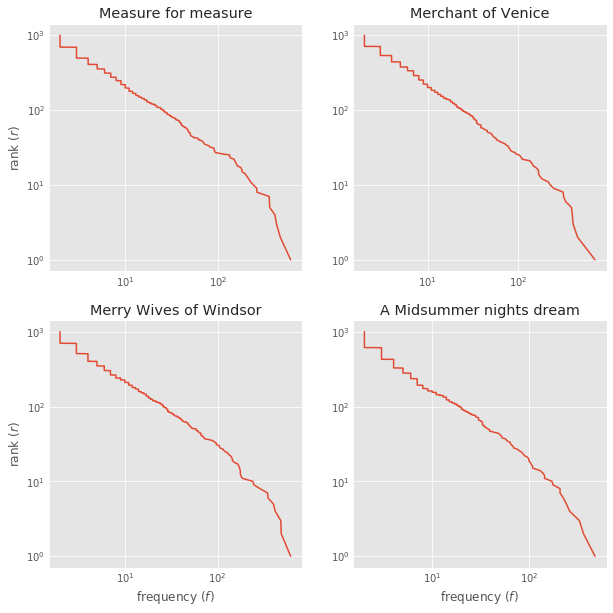

In [215]:
f, ax_dict = plt.subplots(2,2, figsize = (10,10))
ax_dict = ax_dict.flatten()
ii = 0
for key in list(freqs.keys())[18:]:
    ax_dict[ii].loglog(freqs[key], np.arange(1, len(freqs[key])+1))
    ax_dict[ii].set_title(key)
    if ii % 2 == 0:
        ax_dict[ii].set_ylabel('rank ($r$)')
    if ii >= 2:
        ax_dict[ii].set_xlabel('frequency ($f$)')
    ii += 1
    if ii > 3:
        break
plt.savefig('shake_plots.png')

In [238]:
slopes = {}
for key in freqs:
    log_rank = np.log(np.arange(1,1001))
    log_freqs = np.log(freqs[key])
    print(stats.linregress(log_rank, log_freqs).slope)
    slopes[key] = stats.linregress(log_rank, log_freqs).slope

-1.0798377338787242
-1.043633604273753
-1.052632462337193
-1.0800162359761727
-1.0914904856017222
-1.0972645014505946
-1.0824491034736174
-1.0849269167659303
-1.084209207605898
-1.053140607700049
-1.0821450834106496
-1.0524946255713594
-1.0655957347611793
-1.0506447390470053
-1.0788139926780251
-1.080977823207561
-1.0495766961057655
-1.0040381102666651
-1.1034472687894712
-1.0878601479911705
-1.118471250556796
-1.0131266566570423
-1.1125475102790197
-1.1135670615868245
-1.0410943442552967
-1.0448143963475607
-1.0491894046770498
-1.0808091493346725
-1.0858358999261453
-0.99722834970715
-1.0317638491098076
-1.0663617128932033
-1.0963963995614248
-1.0795514978394725
-1.0422878201516597
-1.0989712055761494


In [240]:
slopes

{'Henry IV': -1.0798377338787242,
 'Henry VI Part 1': -1.043633604273753,
 'Henry VI Part 2': -1.052632462337193,
 'Henry VI Part 3': -1.0800162359761727,
 'Alls well that ends well': -1.0914904856017222,
 'As you like it': -1.0972645014505946,
 'Antony and Cleopatra': -1.0824491034736174,
 'A Comedy of Errors': -1.0849269167659303,
 'Coriolanus': -1.084209207605898,
 'Cymbeline': -1.053140607700049,
 'Hamlet': -1.0821450834106496,
 'Henry V': -1.0524946255713594,
 'Henry VIII': -1.0655957347611793,
 'King John': -1.0506447390470053,
 'Julius Caesar': -1.0788139926780251,
 'King Lear': -1.080977823207561,
 'Loves Labours Lost': -1.0495766961057655,
 'macbeth': -1.0040381102666651,
 'Measure for measure': -1.1034472687894712,
 'Merchant of Venice': -1.0878601479911705,
 'Merry Wives of Windsor': -1.118471250556796,
 'A Midsummer nights dream': -1.0131266566570423,
 'Much Ado about nothing': -1.1125475102790197,
 'Othello': -1.1135670615868245,
 'Pericles': -1.0410943442552967,
 'Richard

In [236]:
np.mean(slopes)

-1.0688114330375498

In [237]:
stats.ttest_1samp(slopes, -.963)

Ttest_1sampResult(statistic=-21.266047783005, pvalue=1.3418436748276727e-21)

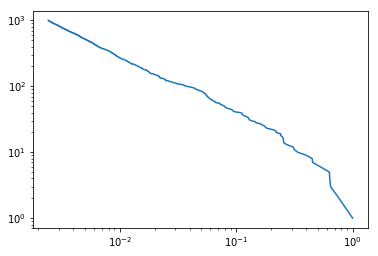

In [86]:
plt.loglog(vals_shake, np.arange(1, len(vals_shake)+1))

In [153]:
log_shake = np.log(vals_shake)
log_posts = np.log(vals_plots)
log_rank = np.log(np.arange(1, len(vals_shake)+1))

In [218]:
stats.linregress(log_rank, log_posts).slope

-0.9630066837798338

In [151]:
slope

-0.9630066837798338